<a href="https://colab.research.google.com/github/AntoniCrous/Aprndizaje_No_Supervisado-Trabajo/blob/master/Agrupamiento_por_Particiones_Ag1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento por Particiones: Kmeans

Este algoritmo se basa en mediante unos centros iniciales moverlos para maximizar la dispersión iterclúster y minimizar la dispersión intraclúster.

In [0]:
#Cargamos las librerias necessarias
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

##Dataset 1 Conocido

El dataset 1 el qual conocemos las classes tiene 1999 instancias.


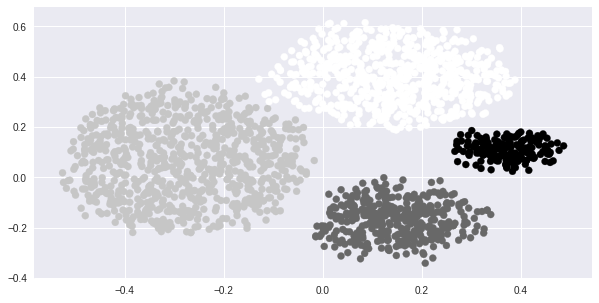

In [4]:
#Cargamos y Mostramos el dataset 1
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_medida.csv'
D1 = np.array(pd.read_csv(data_file_url,header=0))
D1 = D1[ np.random.choice(np.arange(D1.shape[0]), D1.shape[0], replace=False) ,:]
D1x = D1[:,0:2]
D1y = D1[:,2]
print('El dataset 1 el qual conocemos las classes tiene',D1y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)

#### Conocido
Como conocemos el numero de classes assignamos k = 4

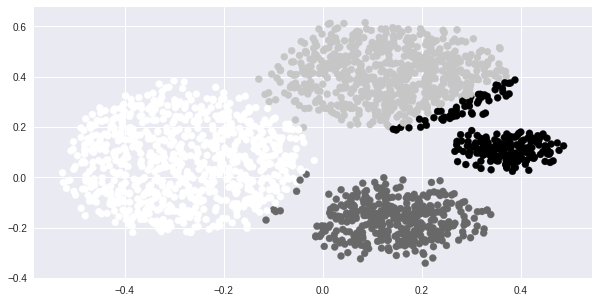

In [7]:
#Creamos el Modelo KMeans C
modelo = KMeans(n_clusters=4)
modelo = modelo.fit(D1x)
Dyp_sk = modelo.predict(D1x)
cD1x_sk = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=Dyp_sk)

##Dataset 2  No Conocido

El dataset 1 el qual conocemos las classes tiene 1999 instancias.


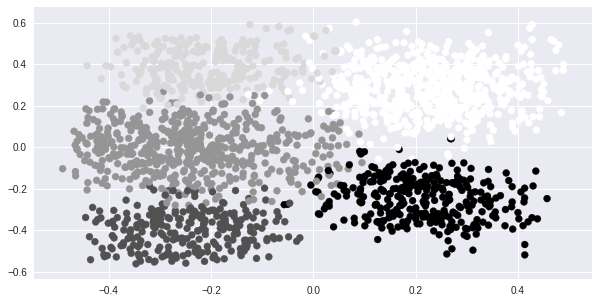

In [12]:
#Cargamos y Mostramos el dataset 2
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_inseparable.csv'
D2 = np.array(pd.read_csv(data_file_url,header=0))
D2 = D2[ np.random.choice(np.arange(D2.shape[0]), D2.shape[0], replace=False) ,:]
D2x = D2[:,0:2]
D2y = D2[:,2]
print('El dataset 1 el qual conocemos las classes tiene',D1y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2y)

#### Dataset No Conocido
Como no conocemos el numero de clusters debemos usar metricas para encontrar el numero de k que maximize la dispersión iterclúster y minimize la dispersión intraclúster.

Text(0, 0.5, 'Medida de R cuadrado')

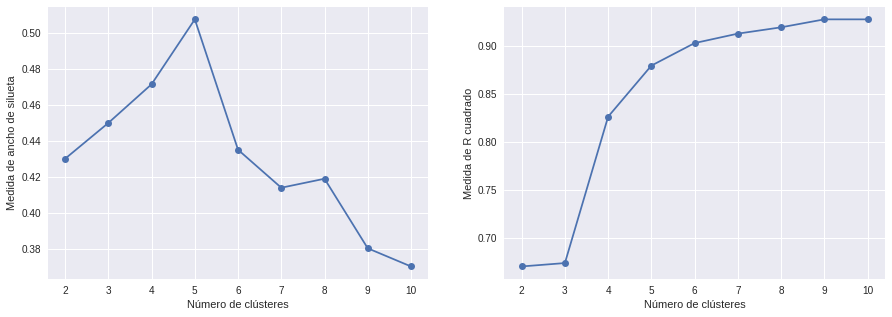

In [13]:
from sklearn.metrics import silhouette_score

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return (sumTotal-interior)/sumTotal

rsilueta = np.zeros(9)
rrsquare = np.zeros(9)
for k in np.arange(2,11):
    modelo = KMeans(n_clusters=k)
    modelo = modelo.fit(D2x)
    D2yp_sk = modelo.predict(D2x)
    cD2x_sk = modelo.cluster_centers_
    rsilueta[k-2] = silhouette_score(D2x, D2yp_sk)
    rrsquare[k-2]  = medida_R_cuadrado(D2x, D2yp_sk, cD2x_sk)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de R cuadrado")

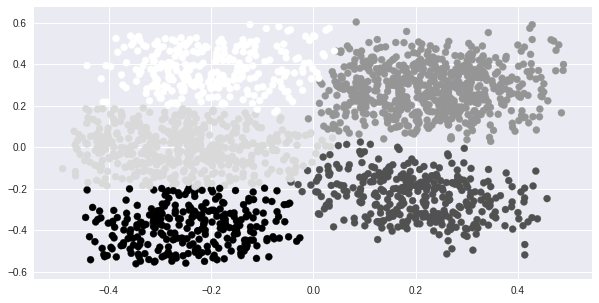

In [14]:
#Creamos el Modelo KMeans
modelo = KMeans(n_clusters=5)
modelo = modelo.fit(D2x)
D2yp_sk = modelo.predict(D2x)
cD2x_sk = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2yp_sk)